<a href="https://colab.research.google.com/github/Emsh1379/Stock_prediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
import yfinance as yf

In [26]:
ms = yf.download("MSFT",
            start = "2012-01-01",
            end ="2021-12-31",
            progress = False )
df = ms[["Adj Close","Open","Close","High","Low"]].round(3)
df['Date']= df.index
df.head()

,Adj Close,Open,Close,High,Low,Date
Date,,,,,,
2012-01-03,21.321,26.55,26.77,26.96,26.39,2012-01-03
2012-01-04,21.823,26.82,27.40,27.47,26.78,2012-01-04
2012-01-05,22.046,27.38,27.68,27.73,27.29,2012-01-05
2012-01-06,22.388,27.53,28.11,28.19,27.53,2012-01-06
2012-01-09,22.094,28.05,27.74,28.10,27.72,2012-01-09


<Axes: xlabel='Date'>

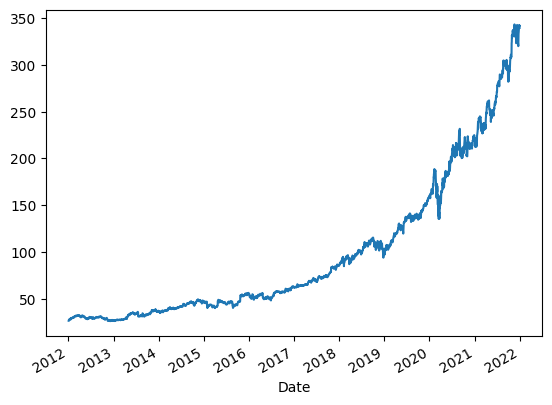

In [27]:
df.Close.plot()

#SVM

R2 score: 0.9559464448661507
Mean absolute error: 6.95121746648073


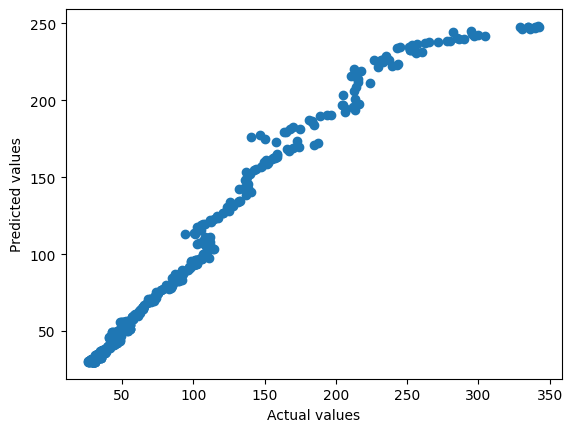

In [31]:
# prompt: build model of svm for date and close values

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
# split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(
    df[['Date']], df['Close'], test_size=0.2, random_state=42)
# fit SVR model on training data
model = SVR()
model.fit(x_train, y_train)
# make predictions on test data
y_pred = model.predict(x_test)
# evaluate model performance
print('R2 score:', model.score(x_test, y_test))
print('Mean absolute error:', np.mean(np.abs(y_test - y_pred)))
# plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


<Axes: xlabel='Date'>

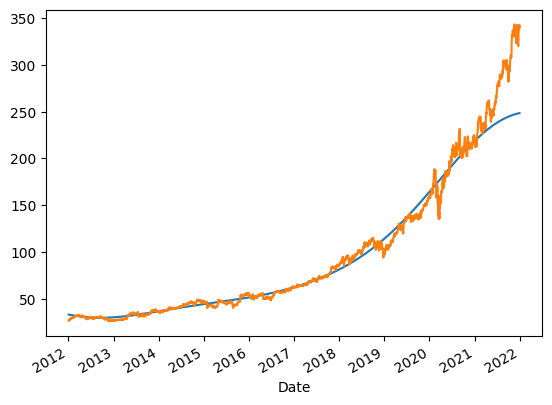

In [36]:
df['Prediction'] = model.predict(df[['Date']])
df.Prediction.plot()
df.Close.plot()


# Train Data

In [8]:
df[:"2020"].Close.values.reshape(-1,1)


array([[ 26.77],
       [ 27.4 ],
       [ 27.68],
       ...,
       [224.15],
       [221.68],
       [222.42]])

# Test Data

In [9]:
df["2021":].Close.values.reshape(-1,1).shape

(251, 1)

In [10]:
train_df = df[:"2020"].Close.values.reshape(-1,1)
test_df = df["2021":].Close.values.reshape(-1,1)

X_train = []
y_train = []
y_steps = 5
X_steps = 10
for i in range(X_steps, len(train_df) - y_steps + 1):
  X_train.append(train_df[i-X_steps:i,0])
  y_train.append(train_df[i:i+y_steps,0])

X = df.Close.values
X = X[len(X)-len(test_df)-X_steps:]
X = X.reshape(-1,1)

X_test = []
y_test = []
for i in range(X_steps, len(test_df) - y_steps + X_steps + 1):
  X_test.append(X[i-X_steps:i,0])
  y_test.append(X[i:i+y_steps,0])






In [11]:
test_df[-15:,0]

array([333.1 , 342.54, 339.4 , 328.34, 334.65, 324.9 , 323.8 , 319.91,
       327.29, 333.2 , 334.69, 342.45, 341.25, 341.95, 339.32])

In [12]:
X_test[-1]


array([333.1 , 342.54, 339.4 , 328.34, 334.65, 324.9 , 323.8 , 319.91,
       327.29, 333.2 ])

In [13]:
y_test[-1]


array([334.69, 342.45, 341.25, 341.95, 339.32])

In [14]:
np.array(X_train).shape


(2251, 10)

In [15]:
def ts_data(df,X_steps,y_steps):
  train_df = df[:"2020"].Close.values.reshape(-1,1)
  test_df = df["2021":].Close.values.reshape(-1,1)

  sc = MinMaxScaler(feature_range=(0,1))
  train_df = sc.fit_transform(train_df)


  X_train = []
  y_train = []
  for i in range(X_steps, len(train_df) - y_steps + 1):
    X_train.append(train_df[i-X_steps:i,0])
    y_train.append(train_df[i:i+y_steps,0])
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

  X = df.Close.values
  X = X[len(X)-len(test_df)-X_steps:]
  X = X.reshape(-1,1)
  X = sc.transform(X)

  X_test = []
  y_test = []
  for i in range(X_steps, len(test_df) - y_steps + X_steps + 1):
    X_test.append(X[i-X_steps:i,0])
    y_test.append(X[i:i+y_steps,0])
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

  return X_train,y_train,X_test,y_test,sc






In [16]:
X_train,y_train,X_test,y_test,sc = ts_data(df,6,2)



In [17]:
X_train.shape



(2258, 6, 1)

In [18]:
y_train.shape




(2258, 2)

In [19]:
X_test.shape

(250, 6, 1)

In [20]:
y_test.shape



(250, 2)

# Simple RNN-Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
simple_rnn_model = Sequential([
                               SimpleRNN(50, return_sequences=True),
                               SimpleRNN(50),
                               Dense(2)
                              ])

In [ ]:
simple_rnn_model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
simple_rnn_model.fit(X_train,y_train,epochs=100,validation_split=0.15)


Epoch 1/100
60/60 [==============================] - 3s 12ms/step - loss: 0.0015 - val_loss: 0.0188
Epoch 2/100
60/60 [==============================] - 1s 15ms/step - loss: 1.3176e-04 - val_loss: 0.0085
Epoch 3/100
60/60 [==============================] - 0s 8ms/step - loss: 1.0028e-04 - val_loss: 0.0066
Epoch 4/100
60/60 [==============================] - 0s 8ms/step - loss: 7.7657e-05 - val_loss: 0.0043
Epoch 5/100
60/60 [==============================] - 0s 8ms/step - loss: 7.1361e-05 - val_loss: 0.0043
Epoch 6/100
60/60 [==============================] - 1s 8ms/step - loss: 6.6313e-05 - val_loss: 0.0034
Epoch 7/100
60/60 [==============================] - 1s 8ms/step - loss: 7.6990e-05 - val_loss: 0.0028
Epoch 8/100
60/60 [==============================] - 0s 7ms/step - loss: 1.4791e-04 - val_loss: 0.0028
Epoch 9/100
60/60 [==============================] - 0s 7ms/step - loss: 5.8585e-05 - val_loss: 0.0032
Epoch 10/100
60/60 [==============================] - 0s 7ms/step - loss: 5

In [ ]:
simple_rnn_pred = simple_rnn_model.predict(X_test)
simple_rnn_pred.shape


8/8 [==============================] - 0s 4ms/step


(250, 2)

In [ ]:
def prediction_plot(predictions):
  fig , ax = plt.subplots(figsize=(10,5))
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(y_test[:,0].reshape(-1,1)),label = "Real")
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(predictions[:,0].reshape(-1,1)),label = "Prediction")

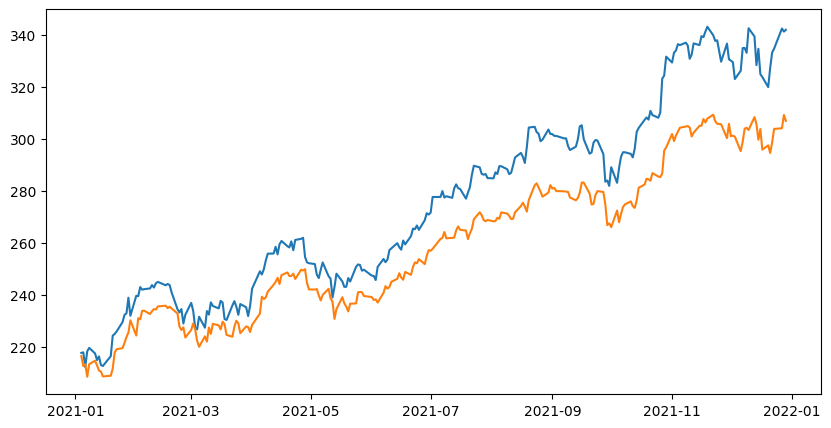

In [ ]:
prediction_plot(simple_rnn_pred)



# LSTM

In [ ]:
from keras.layers import LSTM

In [ ]:
lstm = Sequential([
                               LSTM(50, return_sequences=True),
                               LSTM(50),
                               Dense(2)
                              ])

In [ ]:
lstm.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
lstm.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
60/60 [==============================] - 7s 28ms/step - loss: 0.0075 - val_loss: 0.0153
Epoch 2/100
60/60 [==============================] - 1s 13ms/step - loss: 1.2380e-04 - val_loss: 0.0021
Epoch 3/100
60/60 [==============================] - 1s 12ms/step - loss: 8.4762e-05 - val_loss: 0.0016
Epoch 4/100
60/60 [==============================] - 1s 14ms/step - loss: 7.7626e-05 - val_loss: 9.9257e-04
Epoch 5/100
60/60 [==============================] - 1s 17ms/step - loss: 7.4555e-05 - val_loss: 0.0011
Epoch 6/100
60/60 [==============================] - 1s 19ms/step - loss: 7.2000e-05 - val_loss: 0.0018
Epoch 7/100
60/60 [==============================] - 1s 18ms/step - loss: 6.7943e-05 - val_loss: 0.0014
Epoch 8/100
60/60 [==============================] - 1s 13ms/step - loss: 6.5741e-05 - val_loss: 0.0020
Epoch 9/100
60/60 [==============================] - 1s 13ms/step - loss: 6.6282e-05 - val_loss: 0.0018
Epoch 10/100
60/60 [==============================] - 1s 13ms/st

8/8 [==============================] - 2s 8ms/step


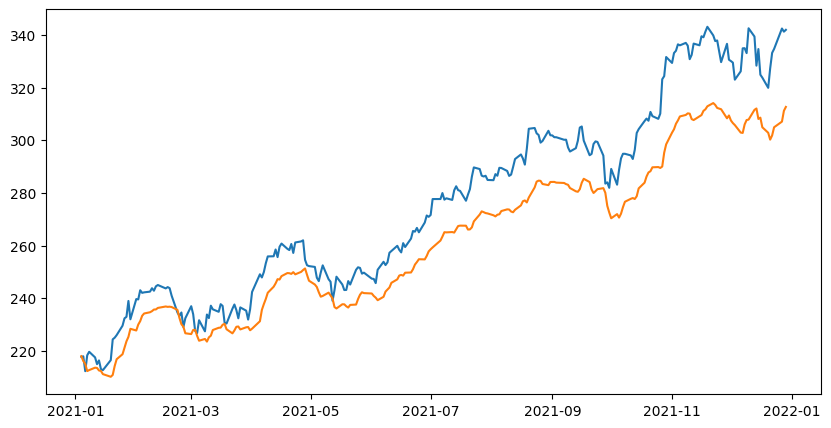

In [ ]:
prediction_plot(lstm.predict(X_test))


